<a href="https://colab.research.google.com/github/GRTO/DiplomadoPucp/blob/master/gestalt_principles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
from google.colab import drive
drive.mount("/content/gdrive")
%cd gdrive/My\ Drive/'Colab Notebooks'/'Data mining'/'Clase 3/'
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[Errno 2] No such file or directory: 'gdrive/My Drive/Colab Notebooks/Data mining/Clase 3/'
/content/gdrive/My Drive/Colab Notebooks/Data mining/Clase 3
'clase 3.ipynb'   HotelesPeru.csv   TP_Excel.pdf


In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker

In [124]:
df = pd.read_csv('HotelesPeru.csv', sep=",", encoding = "utf-8");
df.head()

,Anno,Mes,Arequipa,Piura,Lima,Ayacucho,Trujillo,Puno,Tarapoto,Cajamarca,Moquegua,Ica,Tacna,Cusco,Iquitos,Puerto Maldonado,Ancash,Pucallpa,Huanuco,Huaraz,Chiclayo,Ilo
0,2010,1,28.88,195.49,332.18,144.45,165.41,187.17,255.14,226.57,121.55,104.57,141.83,2462.71,255.51,62.70,180.77,278.89,267.95,309.11,136.19,161.09
1,2010,2,37.13,211.19,386.25,216.24,189.94,225.45,305.72,247.74,113.83,147.83,145.39,2303.15,303.57,71.94,220.70,344.30,301.41,318.54,136.05,224.07
2,2010,3,45.33,244.63,481.26,199.55,236.71,267.26,395.93,329.58,159.52,136.11,186.16,2828.36,362.53,86.99,228.35,374.13,350.09,417.20,179.74,271.98
3,2010,4,151.72,286.04,606.70,222.30,353.29,289.09,515.72,376.22,160.50,130.12,197.98,2714.11,466.33,102.10,241.03,505.63,368.24,460.81,192.02,379.04
4,2010,5,315.08,338.23,684.75,282.16,364.80,326.89,576.19,442.64,174.63,155.13,222.84,2911.72,577.52,118.73,272.57,515.04,391.87,490.38,208.25,370.13


In [125]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Anno,60.0,2012.000000,1.426148,2010.00,2011.0000,2012.000,2013.0000,2014.00
Mes,60.0,6.500000,3.481184,1.00,3.7500,6.500,9.2500,12.00
Arequipa,60.0,185.191833,149.669281,25.75,36.8000,145.315,337.8800,468.67
Piura,60.0,322.473833,74.725535,195.49,275.1850,331.215,353.3475,509.96
Lima,60.0,617.343167,210.344373,332.18,437.9575,620.620,760.6000,1103.12
Ayacucho,60.0,258.511667,94.259182,140.12,190.4225,235.440,308.9050,479.85
Trujillo,60.0,294.418500,85.859854,162.66,212.6800,302.955,354.9250,471.99
Puno,60.0,280.321333,53.730752,181.38,230.4375,290.335,326.3950,367.34
Tarapoto,60.0,499.356167,152.041033,255.14,347.1000,505.325,601.0200,852.91
Cajamarca,60.0,362.241167,79.208782,226.57,282.8450,376.485,433.6175,490.59


- **¿Cuales son las dimensiones existentes en los datos? ¿Puede describir la semántica de los datos?**

La gran mayoria de datos son float los cuales representan el precio de los hoteles al mes por cada distrito del Perú. Los datos int son temporales como el mes y año. Nuestra data tiene 22 columnas y 60 filas. 

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 22 columns):
Anno                60 non-null int64
Mes                 60 non-null int64
Arequipa            60 non-null float64
Piura               60 non-null float64
Lima                60 non-null float64
Ayacucho            60 non-null float64
Trujillo            60 non-null float64
Puno                60 non-null float64
Tarapoto            60 non-null float64
Cajamarca           60 non-null float64
Moquegua            60 non-null float64
Ica                 60 non-null float64
Tacna               60 non-null float64
Cusco               60 non-null float64
Iquitos             60 non-null float64
Puerto Maldonado    60 non-null float64
Ancash              60 non-null float64
Pucallpa            60 non-null float64
Huanuco             60 non-null float64
Huaraz              60 non-null float64
Chiclayo            60 non-null float64
Ilo                 60 non-null float64
dtypes: float64(20), 

**Escoja una ciudad. Muestre la evolución temporal del número de noches entre enero del 2010 y diciembre
del 2014. ¿Cuál es el mejor tipo de grafico que permita comprender la dinámica temporal? ¿Existe
alguna manera de mejorar el grafico utilizado?**

Escogeremos Cuzco, debido a que es la que posee mas ganancia media con la información descrita anteriormente. Si se podria mejorar, si se añadiera información relevante como datos eventos recurrentes en esos meses. Un peruano podria darse cuenta que la mejor fecha para ir al Cusco es Julio Junio ya que ocurre la fiesta del inti raymi y ademas son fechas de fiestas patrias donde la gente acostumbra a viajar y por eso los precios aumentan. 

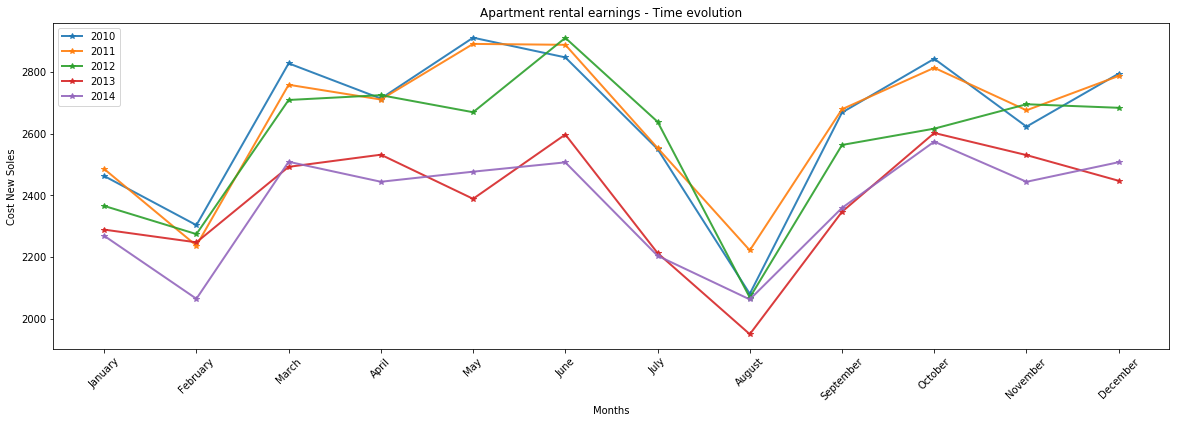

In [135]:
plt.figure(figsize=(20,6))
dfCuzco = df[['Anno', 'Mes', 'Cusco']]
years = list(dfCuzco.Anno.unique())

months = [
'January',
'February',
'March',
'April',
'May',
'June',
'July',
'August',
'September',
'October',
'November',
'December'
]

for year in years:
  dfCuzcoYear = dfCuzco[dfCuzco.Anno == year]
  x = list(dfCuzco.Mes.unique())
  y = dfCuzcoYear.Cusco
  plt.plot(x, y, marker='*', linewidth=2, alpha=0.9)
  plt.xticks(np.arange(len(months)) + 1, months, rotation=45)
  
plt.ylabel('Cost New Soles')
plt.xlabel('Months')
plt.title('Apartment rental earnings - Time evolution')
plt.legend(years)
plt.show()

Escoja otra ciudad y muestre la misma información demandada en la pregunta anterior. Visualice la informacion de ambas ciudades en un solo graficoco. Inspirándose en los Principios de Gestalt, muestre la diferencia entre los ingresos promedios de los hoteles de cada ciudad. Por ejemplo, podría mostrar las ciudades con más/menos ganancias.

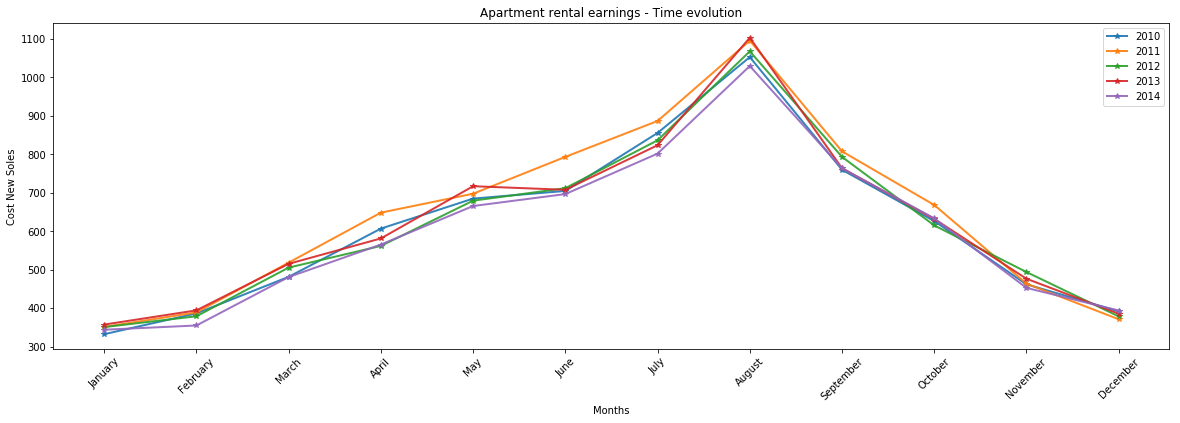

In [136]:
dfLima = df[['Anno', 'Mes', 'Lima']]
plt.figure(figsize=(20,6))
for year in years:
  dfLimaYear = dfLima[dfLima.Anno == year]
  x = list(dfLima.Mes.unique())
  y = dfLimaYear.Lima
  plt.plot(x, y, marker='*', linewidth=2, alpha=0.9)
  plt.xticks(np.arange(len(months)) + 1, months, rotation=45)
  
plt.ylabel('Cost New Soles')
plt.xlabel('Months')
plt.title('Apartment rental earnings - Time evolution')
plt.legend(years)
plt.show()

In [129]:
groupedData = df.groupby(['Mes']).mean().drop(['Anno'], axis=1)[['Lima', 'Cusco']]
groupedData

,Lima,Cusco
Mes,,
1,346.972,2374.220
2,380.558,2225.136
3,500.132,2659.634
4,592.592,2625.228
5,688.772,2667.686
6,722.748,2750.376
7,840.680,2431.828
8,1069.668,2076.260
9,777.502,2523.562


In [130]:
monthsNumbers = np.arange(len(months)) + 1
monthsNumbers

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

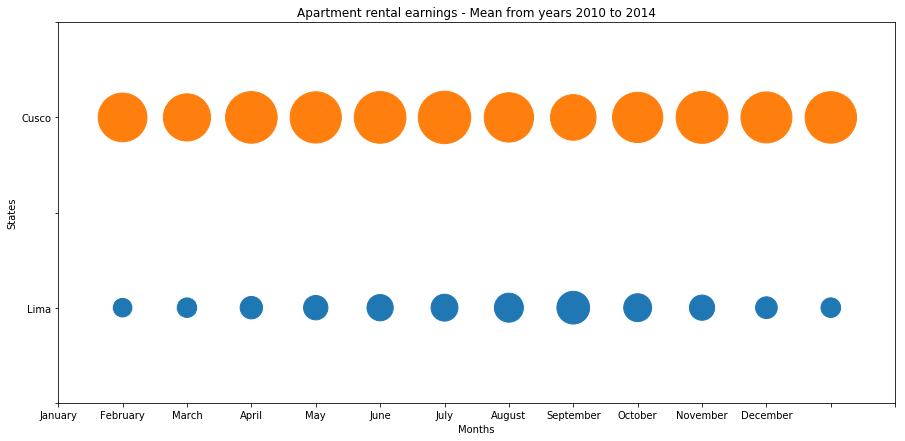

In [131]:
n = len(monthsNumbers)
y = range(n)

columnsDe = ['', 'Lima', '', 'Cusco']

scale = 1
f, ax = plt.subplots(1, 1)
f.set_figheight(7)
f.set_figwidth(15)
ax.scatter(y,[[1]] * n, s=scale * groupedData['Lima'])
ax.scatter(y, [[3]] * n, s=scale * groupedData['Cusco'])
ax.set_xlim(-1, n)
ax.set_ylim(0, 4);
ax.set_title('Apartment rental earnings - Mean from years 2010 to 2014')

ax.set_yticklabels(columnsDe)

yticks = ticker.MaxNLocator(len(columnsDe))

# Set the yaxis major locator using your ticker object. You can also choose the minor
# tick positions with set_minor_locator.
ax.yaxis.set_major_locator(yticks)

ax.set_ylabel('States')


ax.set_xticklabels(months)
xticks = ticker.MaxNLocator(n+1)
ax.xaxis.set_major_locator(xticks)

ax.set_xlabel('Months')
plt.show()

# Problemas más complejos

1. Escoja la manera mas eficaz de realizar una comparaci ́on entre la afluencia de turistas entre muchas
ciudades durante un per ́ıodo de tiempo, por ejemplo, durante el a ̃no 2013. ¿Como podemos tener una
visi ́on “global” de la proporcion de noches entre las ciudades? ¿Sera necesario modificar/re-calcular los
datos originales?

In [132]:
dfAnno = df[df.Anno == 2013].drop(['Anno'], axis=1)
dfAnno

,Mes,Arequipa,Piura,Lima,Ayacucho,Trujillo,Puno,Tarapoto,Cajamarca,Moquegua,Ica,Tacna,Cusco,Iquitos,Puerto Maldonado,Ancash,Pucallpa,Huanuco,Huaraz,Chiclayo,Ilo
36,1,25.75,202.57,357.19,156.07,163.01,181.38,293.47,237.72,139.10,99.84,140.47,2288.67,249.38,60.64,203.88,282.52,296.14,341.35,134.87,198.05
37,2,30.26,209.32,394.15,206.22,183.44,201.53,319.43,245.74,130.79,117.60,143.47,2247.37,277.41,65.15,234.50,321.02,312.30,354.69,132.59,220.88
38,3,50.38,264.32,515.13,235.06,262.25,280.07,434.60,332.79,170.98,125.24,188.82,2492.49,372.11,82.75,258.97,409.44,379.24,421.51,163.58,316.32
39,4,131.07,288.56,581.13,220.48,288.21,271.64,493.80,351.29,181.15,121.17,180.42,2531.90,435.91,89.77,264.22,492.40,373.82,442.80,178.95,350.88
40,5,304.50,359.55,716.92,303.05,367.70,317.62,626.24,436.76,204.70,149.31,221.69,2388.64,589.37,113.20,280.60,576.98,406.52,535.91,197.31,440.20
41,6,337.70,335.67,707.63,316.92,323.86,331.39,583.74,432.57,212.89,153.37,253.15,2597.43,596.00,110.43,284.40,542.35,403.18,576.71,210.62,388.44
42,7,335.68,324.16,823.48,377.74,373.37,337.48,626.22,443.30,212.84,165.34,228.88,2212.66,778.73,122.01,269.07,623.24,381.24,589.58,201.38,468.86
43,8,450.01,358.89,1103.12,456.24,451.99,334.33,852.91,452.77,179.33,168.09,218.49,1949.24,1023.55,150.64,276.06,856.46,360.99,704.15,179.89,633.91
44,9,346.96,347.13,763.72,297.22,316.44,313.50,603.15,386.00,202.62,152.66,203.31,2346.63,587.47,106.73,263.44,623.35,382.32,525.80,191.78,379.93
45,10,151.07,335.79,631.77,237.86,296.64,303.85,489.71,380.39,226.00,130.61,199.79,2602.38,438.81,99.76,263.02,523.80,391.72,468.19,184.84,339.91


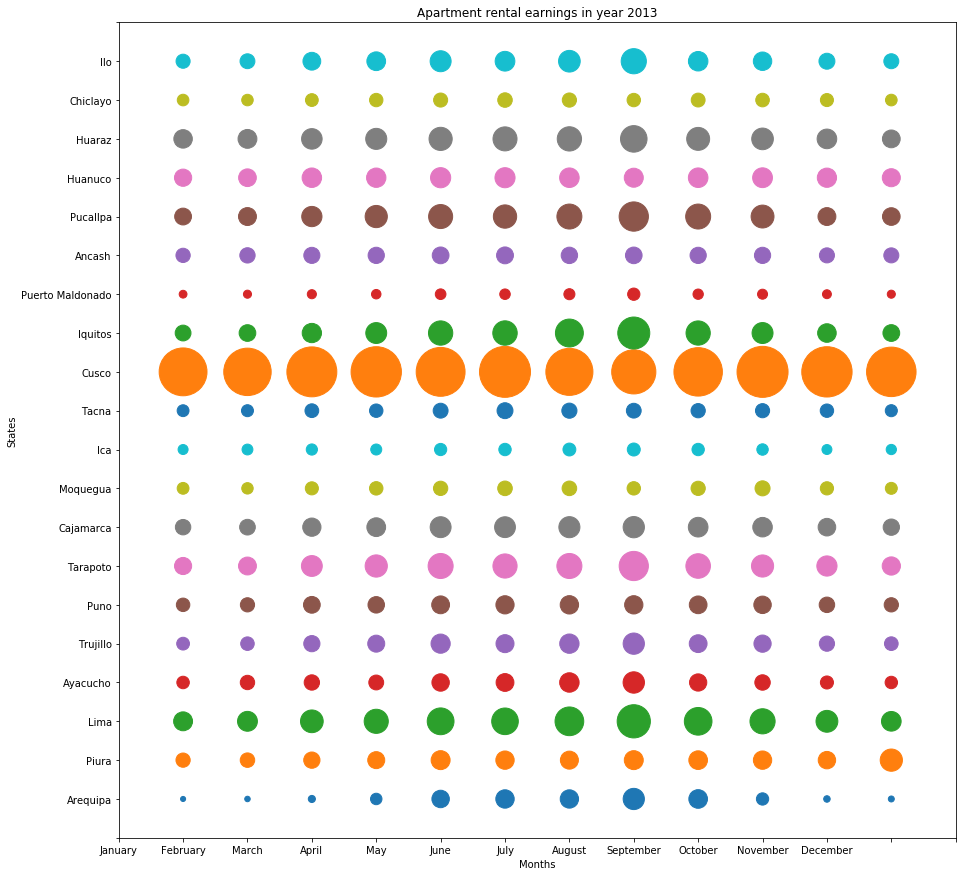

In [133]:
n = len(monthsNumbers)
y = range(n)

scale = 1
f_complex, ax_complex = plt.subplots(1, 1)
f_complex.set_figheight(15)
f_complex.set_figwidth(15)

count = 1

for dep in list(dfAnno.columns[1:]):
  dfDep = dfAnno[dep]
  ax_complex.scatter(y,[[count]] * n, s=scale * dfDep)
  count+=1
  
ax_complex.set_xlim(-1, 12)
ax_complex.set_ylim(0, 21);


ax_complex.set_yticklabels(dfAnno.columns[1:].insert(0, ""))

yticks = ticker.MaxNLocator(len(dfAnno.columns[1:])+1)

# Set the yaxis major locator using your ticker object. You can also choose the minor
# tick positions with set_minor_locator.
ax_complex.yaxis.set_major_locator(yticks)

ax_complex.set_ylabel('States')


ax_complex.set_xticklabels(months)
xticks = ticker.MaxNLocator(n+1)
ax_complex.xaxis.set_major_locator(xticks)

ax_complex.set_xlabel('Months')
ax_complex.set_title('Apartment rental earnings in year 2013')
plt.show()


En esta ocasión la data si fue modificada debido a que en el codigo anterior se utilizó la multiplicación de los precios de alquileres mensuales por una escala para que el gráfico pueda ser representado.

2. Proponga ahora un gr ́afico que muestre las medias del n ́umero de noches en todas las ciudades durante
todos los periodos existentes en los datos. ¿Como calcular la media? ¿Como mostrar eficazmente las
medias? Nota: la media puede calcularse teniendo en cuenta la granularidad temporal de los datos.

Previamente ya se habia calculado la media de los precios por los distintos años para los departamentos de Cuzco y Lima. En esta ocasión se realizará para todos los demas departamentos.

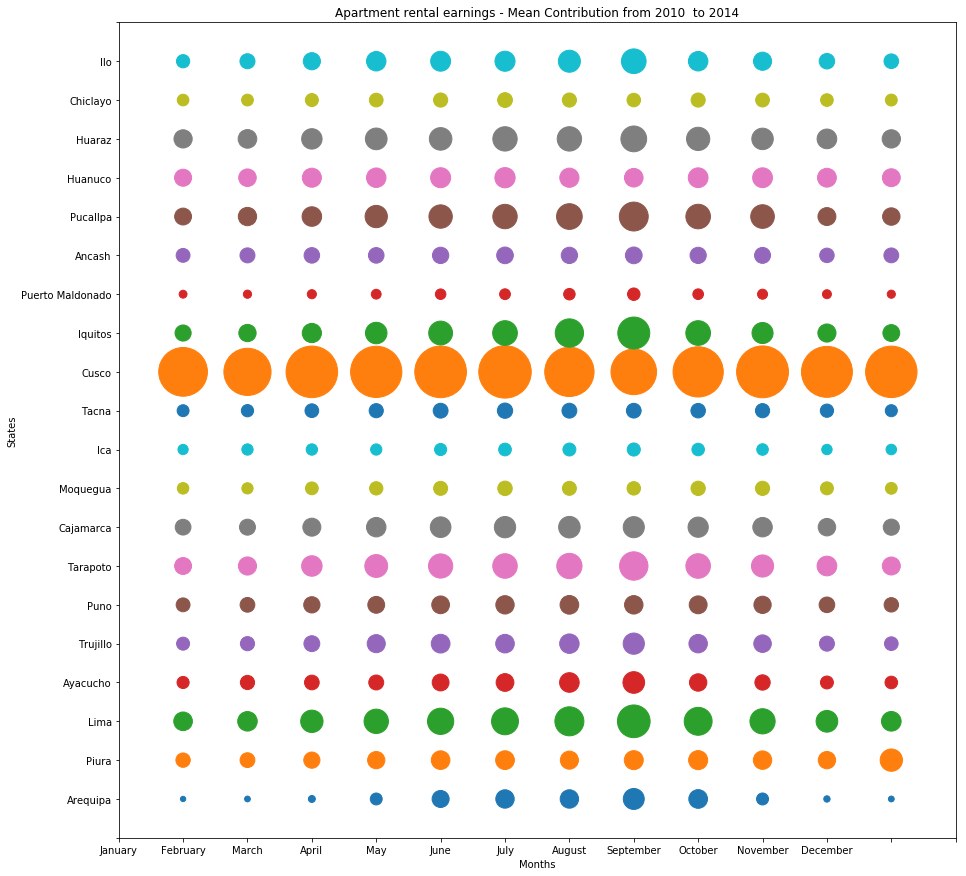

In [134]:
n = len(monthsNumbers)
y = range(n)

dfMean = df.groupby(['Mes']).mean().drop(['Anno'], axis=1)

scale = 1
f_mean, ax_mean = plt.subplots(1, 1)
f_mean.set_figheight(15)
f_mean.set_figwidth(15)

count = 1

for dep in list(dfMean.columns):
  dfDep = dfMean[dep]
  ax_mean.scatter(y,[[count]] * n, s=scale * dfDep)
  count+=1
  
ax_mean.set_xlim(-1, 12)
ax_mean.set_ylim(0, 21);


ax_mean.set_yticklabels(dfMean.columns.insert(0, ""))

yticks = ticker.MaxNLocator(len(dfMean.columns)+1)

# Set the yaxis major locator using your ticker object. You can also choose the minor
# tick positions with set_minor_locator.
ax_mean.yaxis.set_major_locator(yticks)

ax_mean.set_ylabel('States')


ax_mean.set_xticklabels(months)
xticks = ticker.MaxNLocator(n+1)
ax_mean.xaxis.set_major_locator(xticks)

ax_mean.set_xlabel('Months')
ax_mean.set_title('Apartment rental earnings - Mean Contribution from 2010  to 2014')
plt.show()

3. ¿Como podemos mostrar eficazmente los tıtulos, leyendas y otras informaciones adicionales a los graficos obtenidos anteriormente?

En esta ocasión el titulo debe de expresar lo que anteriormentese menciona en los graficos. EL titulo y grafico deben estar acordes. Además, en los graficos anteriores se colocó información en ambos ejes de los ticks del gráfico y ademas en los labels. Esto ayuda a representar de mejor manera la infomarción y brinda detalle de los datos. Otra forma de mostrar mejor la información de los graficos anteriores seria añadir la función de **Hover por lo circulos**, en donde se brinde mayor información de lo que ocurre en cada mes. Por ejemplo, al pasar el mouse por encima de algunas circuferencias se podria brindar información sobre el precio medio del alquiler de hoteles, o que eventos importantes ocurren en el departamente en el mes correspiendente.